In [35]:
from matplotlib import pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

# Load and preprocess data

In [3]:
# Load data
# Use Nov-2023-log10-DO-update-corrected branch
df = pd.read_csv('../../dynamic-learning-rivers/input_data/ICON-ModEx_Data.csv')

In [90]:
years = []
months = []
days = []
hours = []
formats = ["%Y-%m-%d", "%m/%d/%Y"]
for date in df['Date'].values:
    for fmt in formats:
        try:
            parsed_date = dt.datetime.strptime(date, fmt)
            #print('hello')
        except:
            continue
    #raise ValueError(f"Could not parse date '{date}' with any of the provided formats: {formats}")
    
    years.append(parsed_date.year)
    months.append(parsed_date.month)
    days.append(parsed_date.day)

# Get the time of day for the sample
for time in df['Median_Time_Local']:
    #print(time)
    hours.append(int(str(time).split(':')[0].replace('nan','0')))

# Sanity check on dates

Text(0.5, 0, 'Line number in input file')

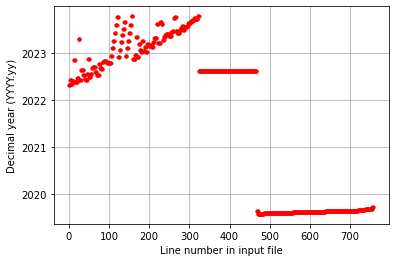

In [71]:
fig, ax = plt.subplots(1,1)
ax.plot(np.add(np.add(years,np.divide(months,12)),np.divide(days,365))-1/12,'r.')
ax.grid()
plt.ylabel('Decimal year (YYYY.yy)')
plt.xlabel('Line number in input file')

This plot shows the sequential list of decimal year dates in the training data (year + month/12 + day/30). The "cloud" in the upper left is the ICON-ModEx iterations, the tightly constrained group in the center is the SSS sampling campaign in the Yakima River Basin in 2023 and the bottom right points are the S19S samples.


# When are most samples taken?

Text(0, 0.5, 'Number of sites/samples')

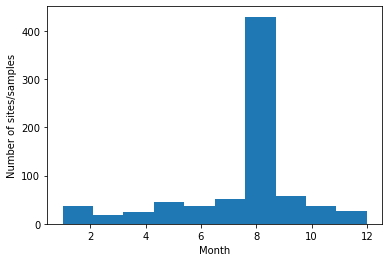

In [93]:
fig, ax = plt.subplots(1,1)
ax.hist(months)
plt.xlabel('Month')
plt.ylabel('Number of sites/samples')

Text(0, 0.5, 'Number of sites/samples')

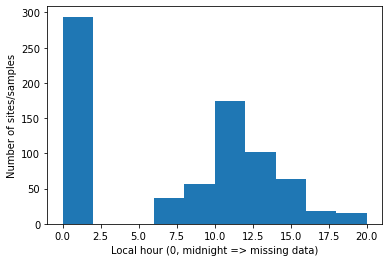

In [94]:
fig, ax = plt.subplots(1,1)
ax.hist(hours)
plt.xlabel('Local hour (0, midnight => missing data)')
plt.ylabel('Number of sites/samples')

# Climatologies

Text(0.5, 0, 'Month of observation')

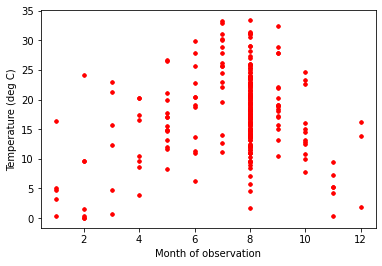

In [95]:
# Climatology scatters - let's plot month versus temperature as a sanity check.
fig, ax = plt.subplots(1,1)
ax.plot(months,df['Mean_Temp_Deg_C'],'r.')
plt.ylabel('Temperature (deg C)')
plt.xlabel('Month of observation')

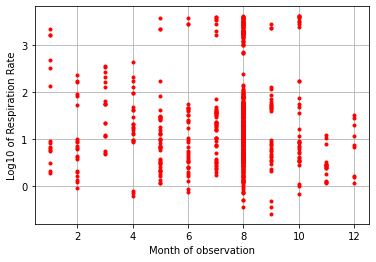

In [97]:
# Respiration rate
fig, ax = plt.subplots(1,1)
ax.plot(months,np.log10(np.abs(df['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])),'r.')
plt.ylabel('Log10 of Respiration Rate')
plt.xlabel('Month of observation')
ax.grid()

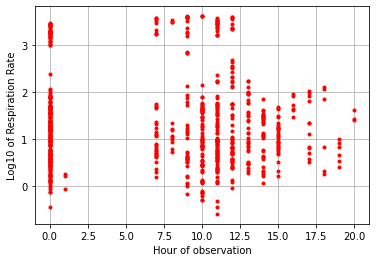

In [98]:
fig, ax = plt.subplots(1,1)
ax.plot(hours,np.log10(np.abs(df['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])),'r.')
plt.ylabel('Log10 of Respiration Rate')
plt.xlabel('Hour of observation')
ax.grid()

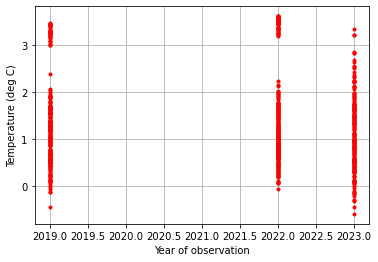

In [99]:
# Respiration rate
fig, ax = plt.subplots(1,1)
ax.plot(years,np.log10(np.abs(df['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])),'r.')
plt.ylabel('Temperature (deg C)')
plt.xlabel('Year of observation')
ax.grid()